In [250]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [251]:
header={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
cookie={}

In [252]:
def getAmazonSearch(search_query):
    url="https://www.amazon.in/s?k="+search_query
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [253]:
def urlSearch(search_query):
    url="https://www.amazon.in/dp/"+search_query
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [254]:
# query
q="apple+watch+charger"
search_response=getAmazonSearch(q)
#find last page of search results
max_pages=1+int(BeautifulSoup(search_response.content).find(class_='a-pagination').find(class_='a-last').previous_sibling.previous_sibling.string)

print(max_pages)

https://www.amazon.in/s?k=apple+watch+charger
8


In [177]:
#find last page of search results

#pprint.pprint(BeautifulSoup(search_response.content).find(class_='a-pagination'))
#print('\n=================================================\n')
#pprint.pprint(BeautifulSoup(search_response.content).find(class_='a-pagination').find(class_='a-last').previous_sibling.previous_sibling.string)
#pprint.pprint(BeautifulSoup(search_response.content).find(class_='a-pagination').findAll(class_='a-disabled'))

SyntaxError: unexpected EOF while parsing (<ipython-input-177-1be17be8f04a>, line 6)

In [255]:
def r(search_query):
    url="https://www.amazon.in"+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [256]:
# Verify response contained product titles
soup=BeautifulSoup(search_response.content)
product_regex=re.compile("^a-size-.* a-color-base a-text-normal")
pres=[p.text for p in soup.findAll('span', {"class": product_regex})]
pres[0]

'Trajectory 3 in 1 Wireless Charger for Apple Watch Charger,Apple Airpods & iPhone Charging Cable Compatible with Apple Watch Series 4/3/2/1 Not for 5 & iPhone 11/XR/XS/XSMax/X/8/8Plus/iPad4/Air/Mini iWatch and Airpods Charger Cable with 2 Wireless Charging Docks'

In [257]:
# extract product names

# product=[]
# for i in range(1,21):
#     search_response=getAmazonSearch(q+"&page="+str(i))
#     soup=BeautifulSoup(search_response.content)
#     for j in soup.findAll("span",attrs={'class':'a-size-medium a-color-base a-text-normal'}):
#         product.append(j.text)

cls=re.compile("^a-size-.* a-color-base a-text-normal")
product=[]
for i in range(1,max_pages):
    search_response=getAmazonSearch(q+"&page="+str(i))
    soup=BeautifulSoup(search_response.content)
    for j in soup.findAll("span",attrs={'class':cls}):
            product.append(j.text)

https://www.amazon.in/s?k=apple+watch+charger&page=1
https://www.amazon.in/s?k=apple+watch+charger&page=2
https://www.amazon.in/s?k=apple+watch+charger&page=3
https://www.amazon.in/s?k=apple+watch+charger&page=4
https://www.amazon.in/s?k=apple+watch+charger&page=5
https://www.amazon.in/s?k=apple+watch+charger&page=6
https://www.amazon.in/s?k=apple+watch+charger&page=7


import re
# for tag in soup.find_all(re.compile(tag_regex)):
#     print(tag.name)
def product_html(span):
    return span and not re.compile("a-color-base a-text-normal$").search(span)
    
html_doc=search_response.content
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

product_regex=re.compile("^a-size-.* a-color-base a-text-normal")
pres=[p.text for p in soup.findAll('span', {"class": product_regex})]
print(pres)

In [258]:
product[0:5]
#print(search_response.text)

['Trajectory 3 in 1 Wireless Charger for Apple Watch Charger,Apple Airpods & iPhone Charging Cable Compatible with Apple Watch Series 4/3/2/1 Not for 5 & iPhone 11/XR/XS/XSMax/X/8/8Plus/iPad4/Air/Mini iWatch and Airpods Charger Cable with 2 Wireless Charging Docks',
 'EDIO 2 Ezone 2 in 1 Wireless Charger for Apple Watch Series 1 2 3 4 USB Magnetic Charging Cable 1 mtr for iPhone',
 'SYSTENE 3 in 1 Charging Dock Station Phone Holder Compatible for iPhone/Apple Watch/Apple AirPods - Black',
 'systene 4 in 1 Wireless Charger Charging Stand Docking Station for iPhone, Stand for Apple Watch Wireless Charging Case for Air Pods',
 'EDIO 2 Ezone 2 in 1 Wireless Charger for Apple Watch Series 1 2 3 4 USB Magnetic Charging Cable 1 mtr for iPhone']

In [260]:
# scrape the data ASIN number
tag=[]
for i in range(1,max_pages):
    search_response=getAmazonSearch(q+"&page="+str(i))
    soup=BeautifulSoup(search_response.content)
    tag.extend([j["data-asin"] for j in soup.findAll("div", attrs={"data-asin":True})])
    #for j in soup.findAll("div", attrs={"data-asin":True}):
    #    tag.j["data-asin"]
print("Number of products: ",len(tag))

https://www.amazon.in/s?k=apple+watch+charger&page=1
https://www.amazon.in/s?k=apple+watch+charger&page=2
https://www.amazon.in/s?k=apple+watch+charger&page=3
https://www.amazon.in/s?k=apple+watch+charger&page=4
https://www.amazon.in/s?k=apple+watch+charger&page=5
https://www.amazon.in/s?k=apple+watch+charger&page=6
https://www.amazon.in/s?k=apple+watch+charger&page=7
Number of products:  362


<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="https://m.media-amazon.com" rel="dns-prefetch"/><link href="https://completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1
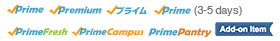
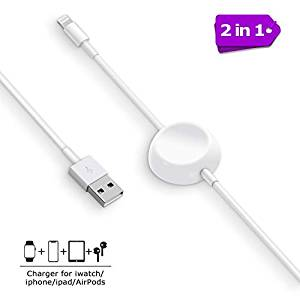

In [238]:
soup=BeautifulSoup(res.content,'html.parser')
print(soup)

In [263]:
link=[]
# for i in range(5):
for i in range(len(tag)):
    ##if tag[i]!="":
    res=urlSearch(tag[i])
    soup=BeautifulSoup(res.content)
    for j in soup.findAll('a',attrs={"data-hook":"see-all-reviews-link-foot"}):
        link.append(j['href'])


https://www.amazon.in/dp/B07ZTC2VNG
https://www.amazon.in/dp/B07W52JL91
https://www.amazon.in/dp/B07N87H33X
https://www.amazon.in/dp/B0825Y3G63
https://www.amazon.in/dp/B07W52JL91
https://www.amazon.in/dp/B07Z5P65ZZ
https://www.amazon.in/dp/B07VZ5TNCQ
https://www.amazon.in/dp/B0799LXN7K
https://www.amazon.in/dp/B07MW1RZDQ
https://www.amazon.in/dp/B07ZTC2VNG
https://www.amazon.in/dp/B07V2P1SL5
https://www.amazon.in/dp/B07KBBSVRZ
https://www.amazon.in/dp/B07X42N4YF
https://www.amazon.in/dp/B07W7RKCQ8
https://www.amazon.in/dp/B07WTQ4SJQ
https://www.amazon.in/dp/B07GDDTCYT
https://www.amazon.in/dp/B07S1BSJMJ
https://www.amazon.in/dp/B0127F1IC4
https://www.amazon.in/dp/B07X2VR6N4
https://www.amazon.in/dp/B07LBRPKPF
https://www.amazon.in/dp/B07Y9MC1KH
https://www.amazon.in/dp/B07H86V33N
https://www.amazon.in/dp/B07WZY2CQD
https://www.amazon.in/dp/B07TCBX4T1
https://www.amazon.in/dp/B07GBRL56F
https://www.amazon.in/dp/B07MKHXCC3
https://www.amazon.in/dp/B07X911CSS
https://www.amazon.in/dp/B07

https://www.amazon.in/dp/B07WH5XS4X
https://www.amazon.in/dp/B07VW87T17
https://www.amazon.in/dp/B07XRMRTK2
https://www.amazon.in/dp/B07ZXY8F6C
https://www.amazon.in/dp/B07B6BJ9XF
https://www.amazon.in/dp/B00W9VR3TE
https://www.amazon.in/dp/B07G7DMNKQ
https://www.amazon.in/dp/B07LBS2BDZ
https://www.amazon.in/dp/B07MN2LX23
https://www.amazon.in/dp/B07R9S4Y71
https://www.amazon.in/dp/B07GDGD9JN
https://www.amazon.in/dp/B07XNYZBGF
https://www.amazon.in/dp/B07DBNMVXH
https://www.amazon.in/dp/B07PQHBFKX
https://www.amazon.in/dp/B07TJQFRMF
https://www.amazon.in/dp/B07TLVN9L8
https://www.amazon.in/dp/B07P9JKCHH
https://www.amazon.in/dp/B01DA9R80C
https://www.amazon.in/dp/B07XNZHPJ3
https://www.amazon.in/dp/B0816Q8FC4
https://www.amazon.in/dp/B074MF797L
https://www.amazon.in/dp/B081BF8T7F
https://www.amazon.in/dp/B07NVTVG53
https://www.amazon.in/dp/B0816PMPXQ
https://www.amazon.in/dp/B07DG1KS3D
https://www.amazon.in/dp/B07Z94PMYM
https://www.amazon.in/dp/B07MDMNCMC
https://www.amazon.in/dp/B08

In [262]:
# preview review response
# data-a-popover="{&quot;inlineContent&quot;:&quot;Amazon calculates a product\'s star ratings based on a machine learned model instead of a raw data average. The model takes into account factors including the age of a rating, whether the ratings are from verified purchasers and factors that establish reviewer trustworthiness.&quot;}"
# <h2 class="inline-title">Customer reviews</h2>

# <span class="a-declarative" data-action="reviews:filter-action:push-state" data-reviews:filter-action:push-state="{&quot;allowLinkDefault&quot;:&quot;1&quot;}"><a data-reftag="cm_cr_arp_d_viewpnt_rgt" data-reviews-state-param="{&quot;filterByStar&quot;:&quot;critical&quot;,&quot;pageNumber&quot;:&quot;1&quot;}" class="a-size-base a-link-normal see-all" href="/Fitbit-Health-Fitness-Smartwatch-Onesize/product-reviews/B07B9W4V3Z/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&amp;filterByStar=critical&amp;reviewerType=all_reviews">See all 292 critical reviews</a>
# <div class="a-profile-content"><span class="a-profile-name">Batman Customer</span></div></a></div><div class="a-row"><i data-hook="review-star-rating-view-point" class="a-icon a-icon-star a-star-3 review-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i><span class="a-letter-space"></span><span data-hook="review-title" class="a-size-base review-title a-text-bold">Above average at best. Read before you buy!</span></div><div class="a-row"><span class="a-size-base a-color-secondary review-date">30 October 2018</span></div><div class="a-row a-spacing-top-mini"><span class="a-size-base">Final update: After 10 months of
# <a class="a-size-base a-link-normal" href="/gp/customer-reviews/R11LZBNCJU9P7A/ref=cm_cr_arp_d_viewpnt?ie=UTF8&amp;ASIN=B07B9W4V3Z#R11LZBNCJU9P7A">Read more</a></div>\n  </div><div class="a-row a-spacing-top-small"><span class="a-size-small a-color-tertiary"><span class="review-votes">\n          1,543 people found this helpful</span>\n      </span></div></div></div><hr class="a-spacing-large a-divider-normal"/>
# <div id="R11LZBNCJU9P7A" data-hook="review" class="a-section review aok-relative"><div id="R11LZBNCJU9P7A-review-card" class="a-row a-spacing-none"><div id="customer_review-R11LZBNCJU9P7A" class="a-section celwidget">
# response=r(link[0])
# print(response.content)
# soup=BeautifulSoup(response.content)
# soup.findAll("div", attrs={"data-hook": "review"})
print(link)

['/Trajectory-Wireless-Charger-Charging-Compatible/product-reviews/B07ZTC2VNG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews', '/EDIO-Ezone-Wireless-Magnetic-Charging/product-reviews/B07W52JL91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews', '/SYSTENE-Charging-Station-Compatible-AirPods/product-reviews/B07N87H33X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews', '/EDIO-Ezone-Wireless-Magnetic-Charging/product-reviews/B07W52JL91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews']


In [35]:
soup=BeautifulSoup(response.content)
revs=soup.findAll("div", attrs={"data-hook": "review"})
print(len(revs))
print(revs[1].prettify())

#<div class="a-section review aok-relative" data-hook="review" id="R9JHCWTP5Q79H">
# <a class="a-link-normal" href="/gp/customer-reviews/R9JHCWTP5Q79H/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07B9W4V3Z" title="2.0 out of 5 stars">
#      <i class="a-icon a-icon-star a-star-2 review-rating" data-hook="review-star-rating">
#       <span class="a-icon-alt">
#        2.0 out of 5 stars
#       </span>
#      </i>
#     </a>
# <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R9JHCWTP5Q79H/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07B9W4V3Z">
#      <span class="">
#       Don't Buy Black Fitbit Versa
#      </span>
#     </a>
# <span class="a-size-base a-color-secondary review-date" data-hook="review-date">
#     30 August 2018
#    </span>
#       <span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge">
#        Verified Purchase
#       </span>
#     <span class="a-size-base review-text review-text-content" data-hook="review-body">
#      <span class="">
#       I had purchased a Black Versa from Amazon India on 12th August 2018, not even 1 month old, the color of the watch body has started peeling off and white edges have come out, on informing customer care they say we can't do anything nor can we replace. This company should refrain from manufacturing black color watches if they are unable to provide with a permanent color. Never buy the color models. Such costly watches and they don't even bother to provide permanent body colors. Thoroughly disgusted with the product, even it doesn't count steps properly.
#      </span>
#     </span>
#     <span class="a-size-base a-color-tertiary cr-vote-text" data-hook="helpful-vote-statement">
#         225 people found this helpful
#        </span>

10
<div class="a-section review aok-relative" data-hook="review" id="R9JHCWTP5Q79H">
 <div class="a-row a-spacing-none" id="R9JHCWTP5Q79H-review-card">
  <div class="a-section celwidget" id="customer_review-R9JHCWTP5Q79H">
   <div class="a-row a-spacing-mini" data-hook="genome-widget">
    <a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AEAEWHQUZDGE4QBZW25C4WVM5YOA/ref=cm_cr_arp_d_gw_btm?ie=UTF8">
     <div aria-hidden="true" class="a-profile-avatar-wrapper">
      <div class="a-profile-avatar">
       <img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/>
       <noscript>
        <img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/>
       </noscript>
      </div>
     </div>
     <div class="a-profile-content">
      

In [122]:
pattern=re.compile('(review.*)|(helpful-.*)|(avp-.*)')
bs=revs[1]
print(bs.div.parent['id'])
#print(bs.select("div.a-section")[0]['id'])


# res=bs.findAll('span', attrs={'data-hook':'review-body'})
res=[{s['data-hook']:s.text} for s in bs.findAll(attrs={'data-hook':pattern})]

print(res)
print(link[0].split('/'))

R9JHCWTP5Q79H
[{'review-star-rating': '2.0 out of 5 stars'}, {'review-title': "Don't Buy Black Fitbit Versa\n"}, {'review-date': '30 August 2018'}, {'avp-badge': 'Verified Purchase'}, {'review-body': "I had purchased a Black Versa from Amazon India on 12th August 2018, not even 1 month old, the color of the watch body has started peeling off and white edges have come out, on informing customer care they say we can't do anything nor can we replace. This company should refrain from manufacturing black color watches if they are unable to provide with a permanent color. Never buy the color models. Such costly watches and they don't even bother to provide permanent body colors. Thoroughly disgusted with the product, even it doesn't count steps properly.\n"}, {'review-voting-widget': '\n225 people found this helpful\n\n          Helpful\n\n'}, {'helpful-vote-statement': '225 people found this helpful'}, {'vote-helpful-button': '\n          Helpful\n'}]
['', 'Fitbit-Health-Fitness-Smartwatch-

In [264]:
import datetime
import pprint
from collections import defaultdict
reviews=[]
pattern=re.compile('(^(?!.*widget)review.*)|(helpful-vote.*)|(avp-.*)')
# for i in range(len(link)):
#     response=r(link[i])
#     soup=BeautifulSoup(response.content)
#     for j in soup.findAll('span',attrs={"data-hook":"review-body"}):
#        reviews.append(j.text)
for i in range(len(link)):
    row=defaultdict()
    l=link[i].split('/')
    row['product_name']=l[1]
    row['ASIN']=l[3]
    row['reviews']=[]
    response=r(link[i])
    soup=BeautifulSoup(response.content)
    for bs in soup.findAll("div", attrs={"data-hook": "review"}):
#         res=defaultdict()
        res={s['data-hook']:s.text.strip('\n') for s in bs.findAll(attrs={'data-hook':pattern})}
        res['review-id']=bs.div.parent['id']
#         res.append({'review_id':bs.div.parent['id']})
        res['review-date']=datetime.datetime.strptime(res['review-date'], '%d %B %Y').date()
        row['reviews'].append(res)
    reviews.append(row)
pprint.pprint(reviews[0])        

https://www.amazon.in/Trajectory-Wireless-Charger-Charging-Compatible/product-reviews/B07ZTC2VNG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/EDIO-Ezone-Wireless-Magnetic-Charging/product-reviews/B07W52JL91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/SYSTENE-Charging-Station-Compatible-AirPods/product-reviews/B07N87H33X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/EDIO-Ezone-Wireless-Magnetic-Charging/product-reviews/B07W52JL91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Charging-Airpods-Charger-Wireless-Station/product-reviews/B07VZ5TNCQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/AE-Accessories-Wireless-USB-Compatible/product-reviews/B0799LXN7K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Gelink-Compatible-Apple-Midnight-Silver/product-reviews/B07MW1RZDQ/re

https://www.amazon.in/Noise-ColorFit-Pro-Fitness-Watch/product-reviews/B07TLVN9L8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/RAEGR-Qi-Certified-Wireless-Fire-Proof-RG10048/product-reviews/B07SQQJNSM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/NOYMI-Wireless-Automatic-Clamping-Charging/product-reviews/B07SX81B6C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Teclusive-Luxury-Charging-Holder-iPhone/product-reviews/B07SN6V7GW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Rechargeable-Plastic-Charger-Charging-Station/product-reviews/B06XRQHQN8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/OOOUSE-Charging-Silicone-AirPods-Included/product-reviews/B07S5H8XKQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Wireless-Charging-Multiple-Organizer-Smartphones/product-reviews/B0

https://www.amazon.in/Crysendo-Flexible-Tube-Cable-Protectors/product-reviews/B07FLP34BH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/MTT-Certified-Lightning-Ultra-Compact-Connector/product-reviews/B0748KXPFJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/SKYVIK-Certified-Wireless-Charger-Samsung/product-reviews/B074K9R8NQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Yootech-Wireless-Qi-Certified-Compatible-Qi-Enabled/product-reviews/B079KZ49PJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Housesczar-Charging-Charger-Vivosmart-Fitness/product-reviews/B07PWM8MSW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Teconica-Bluetooth-Activity-Waterproof-Functions/product-reviews/B07Y6FWV82/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/MX-2712-3-Way-Universal-Adapter/product-r

https://www.amazon.in/PINHEN-iwatch44-TF-EXRA-LIJK-44mm-Strap/product-reviews/B07NQB422G/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/YT-Mobile-Holder-Smartphones-Tablet/product-reviews/B07B6BJ9XF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Orzly®-DuoStand-Station-AppleWatch-Aluminium/product-reviews/B00W9VR3TE/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/CXV-CASES-Compatible-Charger-Charging/product-reviews/B07G7DMNKQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/TASLAR-Ultra-Thin-Anti-Scratch-Protective-Flexible/product-reviews/B07LBS2BDZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/ProElite-Nylon-Watch-Wrist-Hibiscus/product-reviews/B07MN2LX23/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/FairOnly-Magnetic-Wireless-Portable-Accessory/product-reviews/B07R9S4Y71

https://www.amazon.in/CXV-CASES®-Charger-Compatible-iPhone/product-reviews/B07QXC7QCX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/EDIO-Ezone-Wireless-Magnetic-Charging/product-reviews/B07W52JL91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/ShopyBucket-Wireless-Charger-Magnetic-Charging/product-reviews/B07TCBX4T1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
https://www.amazon.in/Ntron-Hybird-Cover-Stand-iPhone/product-reviews/B071NY77T4?reviewerType=all_reviews
https://www.amazon.in/mobicell-Waterproof-Bluetooth-Wristband-Pedometer/product-reviews/B076F4R59Z?reviewerType=all_reviews
defaultdict(None,
            {'ASIN': 'B07ZTC2VNG',
             'product_name': 'Trajectory-Wireless-Charger-Charging-Compatible',
             'reviews': []})


In [128]:
reviews

[{'product_name': 'Fitbit-Health-Fitness-Smartwatch-Onesize',
  'ASIN': 'B07B9W4V3Z',
  'reviews': [[{'review-star-rating': '3.0 out of 5 stars'},
    {'review-title': 'Above average at best. Read before you buy!'},
    {'review-date': '30 October 2018'},
    {'avp-badge': 'Verified Purchase'},
    {'review-body': "Final update: After 10 months of consistent use. Before i begin i must tell i come from the family of bands which were pretty low end. For example i have used mi band - 1 to 3, honor band 3. Plus, newest honor band 4. I have had some experience with the fitness products. So, I decided to make a big jump to this top product offered by fitbit. Here is my detailed reviewPros -- Beautiful Sceen quality. Screen is gorgeous, it will turn heads for sure.- 15 Exercise modes - As fitbit is a company dedicated to fitness, they know their genre. That's why the fitness tracking features are diverse. From yoga to walk to run to weights, you will find everything. This is the best feature 

In [143]:
import json
from pandas.io.json import json_normalize  

d={'data':reviews}
# pprint.pprint(d)
#dataJSON=json.dumps(data)
# df=pd.DataFrame(reviews)
# # df=df.drop_duplicates()
# #df.to_csv('amazon_webscraping_hp_laptop.csv',index=False)
# print(df)
df=json_normalize(data = d['data'], 
                            record_path ='reviews',  
                            meta =['product_name', 'ASIN']) 
print(df)
df['review-star-rating'].str.split(' ')[0]

     review-star-rating                                 review-title  \
0    3.0 out of 5 stars  Above average at best. Read before you buy!   
1    2.0 out of 5 stars                 Don't Buy Black Fitbit Versa   
2    3.0 out of 5 stars                        Tracking not accurate   
3    1.0 out of 5 stars                                        Worst   
4    4.0 out of 5 stars     My first fitness watch - Detailed review   
..                  ...                                          ...   
527  5.0 out of 5 stars                                 good product   
528  5.0 out of 5 stars                              Value for money   
529  5.0 out of 5 stars                                    Go for it   
530  5.0 out of 5 stars                                 DOES ITS JOB   
531  3.0 out of 5 stars                               quality is okk   

    review-date          avp-badge  \
0    2018-10-30  Verified Purchase   
1    2018-08-30  Verified Purchase   
2    2018-08-08  Veri

In [149]:
df['star_rating']=df['review-star-rating'].str.split(' ').str[0]
df['product_id']=df['ASIN'].str.split('?').str[0]
# df['helpful-vote-statement'].
df['helpful_votes']=df['helpful-vote-statement'].str.split(' ').str[0].fillna(0)
print(df)

     review-star-rating                                 review-title  \
0    3.0 out of 5 stars  Above average at best. Read before you buy!   
1    2.0 out of 5 stars                 Don't Buy Black Fitbit Versa   
2    3.0 out of 5 stars                        Tracking not accurate   
3    1.0 out of 5 stars                                        Worst   
4    4.0 out of 5 stars     My first fitness watch - Detailed review   
..                  ...                                          ...   
527  5.0 out of 5 stars                                 good product   
528  5.0 out of 5 stars                              Value for money   
529  5.0 out of 5 stars                                    Go for it   
530  5.0 out of 5 stars                                 DOES ITS JOB   
531  3.0 out of 5 stars                               quality is okk   

    review-date          avp-badge  \
0    2018-10-30  Verified Purchase   
1    2018-08-30  Verified Purchase   
2    2018-08-08  Veri

In [ ]:
listDF=[pd.DataFrame(review)]